<a href="https://colab.research.google.com/github/RaphaelRAY/airbnb-rating-ml/blob/main/notebooks/01_limpeza_e_preprocessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 01 - Limpeza e Pré-processamento de Dados Airbnb - Rio de Janeiro

Este notebook detalha o processo de limpeza e pré-processamento dos dados do Airbnb para a cidade do Rio de Janeiro, utilizando os arquivo `listings.csv`  . O arquivos `calendar.csv` e `neighbourhoods.csv` foi omitido desta etapa devido ao seu grande volume de dados, que pode ser processado separadamente se necessário e por não conter dados relevantes.

## 1. Configuração Inicial e Carregamento de Dados

Importação das bibliotecas necessárias e carregamento do dataset principal `listings.csv`.

In [87]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import OneHotEncoder

# Criar diretório de saída se não existir
output_dir = "data/processed"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Diretório \'{output_dir}\' criado.")

print("\n--- Carregando listings.csv ---")
df = pd.read_csv("https://raw.githubusercontent.com/RaphaelRAY/airbnb-rating-ml/refs/heads/main/data/listings.csv")
len_df = len(df)
print(f"DataFrame carregado com {len_df} linhas.")


--- Carregando listings.csv ---
DataFrame carregado com 42572 linhas.


In [88]:
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20250624193519,2025-06-28,city scrape,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Please note that elevated rates apply for New ...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, Brazil",I am a journalist/writer. Lived in NYC for ...,within an hour,100%,95%,f,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,5.0,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.965990,-43.179400,Entire condo,Entire home/apt,5,1.0,1 bath,2.0,2.0,"[""Oven"", ""Building staff"", ""TV with standard c...",$254.00,5,28,5.0,5.0,28.0,28.0,5.0,28.0,NaN,t,4,21,31,225,2025-06-28,338,19,1,100,16,190,48260.0,2010-07-15,2025-06-25,4.71,4.76,4.64,4.83,4.91,4.78,4.67,NaN,f,1,1,0,0,1.86
1,25026,https://www.airbnb.com/rooms/25026,20250624193519,2025-07-04,city scrape,Beautiful Modern Decorated Studio in Copacabana,"**Fully renovated in Dec 2022, new kitchen, n...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/7c08fa4f-1d7b...,102840,https://www.airbnb.com/users/show/102840,Viviane,2010-04-03,"Rio de Janeiro, Brazil","Hi guys,\n\nViviane is a commercial photograph...",NaN,NaN,NaN,t,https://a0.muscache.com/im/pictures/user/315dd...,https://a0.muscache.com/im/pictures/user/315dd...,Copacabana,1.0,5.0,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.976490,-43.191220,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Window AC unit"", ""Room-darkening shades"", ""D...",$252.00,2,60,2.0,2.0,60.0,60.0,2.0,60.0,NaN,t,1,1,29,193,2025-07-04,313,23,2,112,29,138,34776.0,2010-06-07,2025-06-23,4.75,4.74,4.81,4.83,4.93,4.85,4.65,NaN,f,1,1,0,0,1.71
2,35764,https://www.airbnb.com/rooms/35764,20250624193519,2025-06-25,city scrape,COPACABANA SEA BREEZE - RIO - 25 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,Patricia Miranda & Paulo,2010-06-27,"Rio de Janeiro, Brazil","Hello, We are Patricia Miranda and Paulo.\nW...",within an hour,100%,97%,t,https://a0.muscache.com/im/users/153691/profil...,https://a0.muscache.com/im/users/153691/profil...,Copacabana,1.0,2.0,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Copacabana,NaN,-22.981070,-43.191360,Entire loft,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Bu

## 2. Limpeza de `listings.csv`

Esta seção aplica as etapas de limpeza para o dataset `listings.csv`.

### 2.1. Padronização de Colunas

Nomes de colunas são padronizados para minúsculas, sem espaços e caracteres especiais.

In [89]:
print("\n--- 2.1. Padronização de colunas ---")
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
print("Colunas padronizadas:")
print(df.columns.tolist())


--- 2.1. Padronização de colunas ---
Colunas padronizadas:
['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availa

### 2.2. Conversão de Variáveis Monetárias

Colunas como `price`, `cleaning_fee`, `security_deposit` e `extra_people` são convertidas para o tipo float, removendo símbolos de moeda e vírgulas.

In [90]:
print("\n--- 2.2. Conversão de variáveis monetárias ---")
monetary_cols = ["price", "cleaning_fee", "security_deposit", "extra_people"]
for col in monetary_cols:
    if col in df.columns:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(r'[$,]', '', regex=True)
            .astype(float)
        )
        print(f"Coluna \'{col}\' convertida para float.")


--- 2.2. Conversão de variáveis monetárias ---
Coluna 'price' convertida para float.


### 2.3. Conversão de Tipos de Dados

Conversão de colunas de data (`host_since`) e booleanas (`host_is_superhost`, `instant_bookable`) para os tipos apropriados.

In [91]:
print("\n--- 2.3. Conversão de tipos ---")
if "host_since" in df.columns:
    df["host_since"] = pd.to_datetime(df["host_since"], errors="coerce")
    print("Coluna \'host_since\' convertida para datetime.")
if "host_is_superhost" in df.columns:
    df["host_is_superhost"] = df["host_is_superhost"].map({"t": 1, "f": 0})
    print("Coluna \'host_is_superhost\' convertida para binário.")
if "instant_bookable" in df.columns:
    df["instant_bookable"] = df["instant_bookable"].map({"t": 1, "f": 0})
    print("Coluna \'instant_bookable\' convertida para binário.")


--- 2.3. Conversão de tipos ---
Coluna 'host_since' convertida para datetime.
Coluna 'host_is_superhost' convertida para binário.
Coluna 'instant_bookable' convertida para binário.


### 2.4. Remoção de Colunas Irrelevantes

Remoção de colunas que não são úteis para a análise ou que contêm informações redundantes/sensíveis.

In [92]:
df['review_scores_rating'].describe()

,review_scores_rating
count,33949.000000
mean,4.806461
std,0.374518
min,0.000000
25%,4.760000
50%,4.920000
75%,5.000000
max,5.000000



--- Histograma de review_scores_rating ---


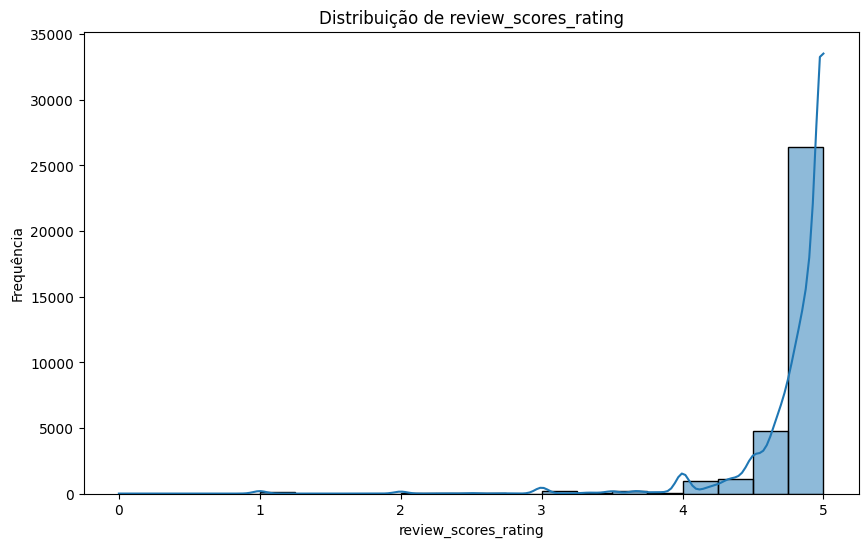

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Histograma de review_scores_rating ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['review_scores_rating'], kde=True, bins=20)
plt.title('Distribuição de review_scores_rating')
plt.xlabel('review_scores_rating')
plt.ylabel('Frequência')
plt.show()

In [94]:
print("\n--- 2.4. Remoção de colunas irrelevantes ---")
drop_cols = [
    "listing_url", "name", "description", "neighborhood_overview", "picture_url",
    "host_url", "host_name", "host_thumbnail_url", "host_picture_url",
    "license", "reviews_per_month",
    #"review_scores_rating",
    "calendar_updated", "neighbourhood_group_cleansed",  'id',
    'scrape_id',
    'source',
    'last_scraped',
    'host_id',
    'host_about',
    'host_location',
    'host_neighbourhood',
    'first_review',
    'last_review',
    'calendar_last_scraped',
    'estimated_occupancy_l365d',
    'estimated_revenue_l365d', 'availability_eoy', 'host_verifications', 'neighbourhood',
     'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews_ly',
    'availability_30', 'availability_60', 'availability_90', 'availability_365',
    'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
    'review_scores_communication', 'review_scores_location', 'review_scores_value'
    # Adicionadas com base na análise anterior
]
df.drop(columns=drop_cols, inplace=True, errors="ignore")
print("Colunas irrelevantes removidas.")
print(f"Número de colunas após remoção: {df.shape[1]}")


--- 2.4. Remoção de colunas irrelevantes ---
Colunas irrelevantes removidas.
Número de colunas após remoção: 36


### 2.5. Tratamento de Valores Ausentes

Análise e tratamento de valores ausentes, incluindo a remoção de colunas com alta porcentagem de NaNs e o preenchimento de outros valores ausentes com medianas ou valores categóricos como 'unknown'.

In [95]:
print("\n--- 2.5. Tratamento de valores ausentes ---")
df["host_response_rate"] = df["host_response_rate"].replace("unknown", np.nan)
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("unknown", np.nan)



--- 2.5. Tratamento de valores ausentes ---


In [96]:
df["host_response_rate"] = (
    df["host_response_rate"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float)
) / 100  # ← converte para proporção

df["host_acceptance_rate"] = (
    df["host_acceptance_rate"]
    .astype(str)
    .str.replace("%", "", regex=False)
    .astype(float)
) / 100  # ← converte para proporção


In [97]:
for col in ['host_has_profile_pic', 'host_identity_verified', 'host_is_superhost', 'instant_bookable','has_availability']:
    if col in df.columns:
        df[col] = df[col].map({'t': 1, 'f': 0}).astype(float)


In [98]:

missing_percentage = (df.isna().sum() / len(df)).sort_values(ascending=False)
print("Percentual de valores ausentes por coluna (Top 20):")
print(missing_percentage.head(20))

# Remover colunas com mais de 70% de NaN
cols_to_drop_nan = missing_percentage[missing_percentage > 0.7].index.tolist()
df.drop(columns=cols_to_drop_nan, inplace=True, errors="ignore")
print(f"Colunas com mais de 70% de NaN removidas: {cols_to_drop_nan}")

# Preencher valores ausentes específicos
if "bathrooms" in df.columns:
    df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].median())
    print("Valores ausentes em \'bathrooms\' preenchidos com a mediana.")
if "host_response_time" in df.columns:
    df["host_response_time"] = df["host_response_time"].fillna("unknown")
    print("Valores ausentes em \'host_response_time\' preenchidos com \'unknown\'.")

# Preencher outras colunas numéricas com a mediana (exemplo)
for col in ["beds", "bedrooms"]:
    if col in df.columns and df[col].dtype != "object": # Check if it\'s numeric and exists
        df[col] = df[col].fillna(df[col].median())
        print(f"Valores ausentes em \'{col}\' preenchidos com a mediana.")

# Preencher colunas categóricas com a moda ou \'unknown\'
for col in ["host_location", "host_neighbourhood"]:
    if col in df.columns:
        df[col] = df[col].fillna("unknown")
        print(f"Valores ausentes em \'{col}\' preenchidos com \'unknown\'.")

# --- Complemento final para garantir que não restem NaN ---

for col in df.columns:
    if df[col].dtype != "object":  # numéricas
        df[col] = df[col].fillna(df[col].median())
    else:  # categóricas
        df[col] = df[col].fillna("unknown")

df.drop(columns='bathrooms_text', inplace=True, errors="ignore")

print("✅ Todos os valores ausentes foram tratados.")


Percentual de valores ausentes por coluna (Top 20):
instant_bookable             1.000000
host_is_superhost            1.000000
review_scores_rating         0.202551
host_response_time           0.188011
host_response_rate           0.188011
host_acceptance_rate         0.117307
bathrooms                    0.085056
beds                         0.084351
price                        0.084093
host_since                   0.036244
host_identity_verified       0.036244
host_listings_count          0.036244
host_total_listings_count    0.036244
host_has_profile_pic         0.036244
bedrooms                     0.017288
has_availability             0.010711
bathrooms_text               0.001315
minimum_maximum_nights       0.000117
minimum_minimum_nights       0.000117
maximum_maximum_nights       0.000117
dtype: float64
Colunas com mais de 70% de NaN removidas: ['instant_bookable', 'host_is_superhost']
Valores ausentes em 'bathrooms' preenchidos com a mediana.
Valores ausentes em 'host_resp

### 2.6. Remoção de Outliers

Remoção de outliers de preço, considerando os 1% inferiores e 1% superiores.

In [99]:
print("\n--- 2.6. Remover outliers ---")
if "price" in df.columns:
    q_low, q_high = df["price"].quantile([0.01, 0.99])
    df = df[(df["price"] >= q_low) & (df["price"] <= q_high)]
    print(f"Outliers de preço removidos (1% inferior e 1% superior). Novo shape: {df.shape}")


--- 2.6. Remover outliers ---
Outliers de preço removidos (1% inferior e 1% superior). Novo shape: (41724, 33)


In [100]:
new_len_df = len(df)
print(f"\nLinhas removidas: {len_df - new_len_df}")
print(f"Linhas restantes: {new_len_df}")


Linhas removidas: 848
Linhas restantes: 41724


Conferir o tipo de cada coluna


In [101]:
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41724 entries, 0 to 42571
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   host_since                                    41724 non-null  datetime64[ns]
 1   host_response_time                            41724 non-null  object        
 2   host_response_rate                            41724 non-null  float64       
 3   host_acceptance_rate                          41724 non-null  float64       
 4   host_listings_count                           41724 non-null  float64       
 5   host_total_listings_count                     41724 non-null  float64       
 6   host_has_profile_pic                          41724 non-null  float64       
 7   host_identity_verified                        41724 non-null  float64       
 8   neighbourhood_cleansed                        41724 non-null  object   

In [102]:
df.head()

,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,2010-01-08,within an hour,1.0,0.95,2.0,5.0,1.0,1.0,Copacabana,-22.96599,-43.17940,Entire condo,Entire home/apt,5,1.0,2.0,2.0,"[""Oven"", ""Building staff"", ""TV with standard c...",254.0,5,28,5.0,5.0,28.0,28.0,5.0,28.0,1.0,4.71,1,1,0,0
1,2010-04-03,unknown,1.0,0.90,1.0,5.0,1.0,1.0,Copacabana,-22.97649,-43.19122,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,"[""Window AC unit"", ""Room-darkening shades"", ""D...",252.0,2,60,2.0,2.0,60.0,60.0,2.0,60.0,1.0,4.75,1,1,0,0
2,2010-06-27,within an hour,1.0,0.97,1.0,2.0,1.0,1.0,Copacabana,-22.98107,-43.19136,Entire loft,Entire home/apt,2,1.5,1.0,1.0,"[""Building staff"", ""Bed linens"", ""Heating"", ""P...",190.0,3,15,3.0,5.0,7.0,15.0,3.1,14.8,1.0,4.91,1,1,0,0
3,2010-01-16,within an hour,1.0,0.95,7.0,33.0,1.0,1.0,Ipanema,-22.98591,-43.20302,Entire rental unit,Entire home/apt,13,7.0,6.0,7.0,"[""Pack \u2019n play/Travel crib"", ""Private pat...",2239.0,7,89,6.0,15.0,89.0,89.0,14.1,89.0,1.0,4.77,6,5,1,0
4,2010-09-03,within an hour,1.0,0.69,1.0,7.0,1.0,1.0,Copacabana,-22.96574,-43.17514,Entire rental unit,Entire home/apt,10,2.5,4.0,4.0,"[""Microwave"", ""Dedicated workspace"", ""Hot wate...",743.0,3,1125,3.0,4.0,1125.0,1125.0,3.0,1125.0,1.0,4.63,1,1,0,0


Converter host_since para “antiguidade do anfitrião”

In [103]:
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
df['host_days_active'] = (pd.Timestamp.today() - df['host_since']).dt.days
df.drop(columns='host_since', inplace=True)


/tmp/ipython-input-656777537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')
/tmp/ipython-input-656777537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_days_active'] = (pd.Timestamp.today() - df['host_since']).dt.days
/tmp/ipython-input-656777537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Tratar amenities (lista de recursos)


In [104]:
df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)
df.drop(columns='amenities', inplace=True)


/tmp/ipython-input-1668716587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amenities_count'] = df['amenities'].apply(lambda x: len(eval(x)) if pd.notna(x) else 0)
/tmp/ipython-input-1668716587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='amenities', inplace=True)


In [105]:
df.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_days_active,amenities_count
0,within an hour,1.0,0.95,2.0,5.0,1.0,1.0,Copacabana,-22.96599,-43.17940,Entire condo,Entire home/apt,5,1.0,2.0,2.0,254.0,5,28,5.0,5.0,28.0,28.0,5.0,28.0,1.0,4.71,1,1,0,0,5777,26
1,unknown,1.0,0.90,1.0,5.0,1.0,1.0,Copacabana,-22.97649,-43.19122,Entire rental unit,Entire home/apt,3,1.0,1.0,2.0,252.0,2,60,2.0,2.0,60.0,60.0,2.0,60.0,1.0,4.75,1,1,0,0,5692,38
2,within an hour,1.0,0.97,1.0,2.0,1.0,1.0,Copacabana,-22.98107,-43.19136,Entire loft,Entire home/apt,2,1.5,1.0,1.0,190.0,3,15,3.0,5.0,7.0,15.0,3.1,14.8,1.0,4.91,1,1,0,0,5607,30
3,within an hour,1.0,0.95,7.0,33.0,1.0,1.0,Ipanema,-22.98591,-43.20302,Entire rental unit,Entire home/apt,13,7.0,6.0,7.0,2239.0,7,89,6.0,15.0,89.0,89.0,14.1,89.0,1.0,4.77,6,5,1,0,5769,33
4,within an hour,1.0,0.69,1.0,7.0,1.0,1.0,Copacabana,-22.96574,-43.17514,Entire rental unit,Entire home/apt,10,2.5,4.0,4.0,743.0,3,1125,3.0,4.0,1125.0,1125.0,3.0,1125.0,1.0,4.63,1,1,0,0,5539,33


In [106]:
from sklearn.preprocessing import OneHotEncoder

# 🔹 Lista das colunas categóricas
cat_features = [
    'host_response_time',
    #'property_type',
    'room_type'
    #'neighbourhood_cleansed'
]

# 🔹 Cria o codificador
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# 🔹 Aplica o encoding e transforma em DataFrame
encoded = encoder.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(cat_features))

# 🔹 Junta as novas colunas codificadas com o restante do DataFrame
df_encoded = pd.concat([df.drop(columns=cat_features).reset_index(drop=True),
                        encoded_df.reset_index(drop=True)], axis=1)

print("✅ One-Hot Encoding concluído!")
print("Formato final:", df_encoded.shape)
df_encoded.head()


✅ One-Hot Encoding concluído!
Formato final: (41724, 40)


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_days_active,amenities_count,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1.0,0.95,2.0,5.0,1.0,1.0,Copacabana,-22.96599,-43.17940,Entire condo,5,1.0,2.0,2.0,254.0,5,28,5.0,5.0,28.0,28.0,5.0,28.0,1.0,4.71,1,1,0,0,5777,26,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.90,1.0,5.0,1.0,1.0,Copacabana,-22.97649,-43.19122,Entire rental unit,3,1.0,1.0,2.0,252.0,2,60,2.0,2.0,60.0,60.0,2.0,60.0,1.0,4.75,1,1,0,0,5692,38,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.97,1.0,2.0,1.0,1.0,Copacabana,-22.98107,-43.19136,Entire loft,2,1.5,1.0,1.0,190.0,3,15,3.0,5.0,7.0,15.0,3.1,14.8,1.0,4.91,1,1,0,0,5607,30,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.95,7.0,33.0,1.0,1.0,Ipanema,-22.98591,-43.20302,Entire rental unit,13,7.0,6.0,7.0,2239.0,7,89,6.0,15.0,89.0,89.0,14.1,89.0,1.0,4.77,6,5,1,0,5769,33,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.69,1.0,7.0,1.0,1.0,Copacabana,-22.96574,-43.17514,Entire rental unit,10,2.5,4.0,4.0,743.0,3,1125,3.0,4.0,1125.0,1125.0,3.0,1125.0,1.0,4.63,1,1,0,0,5539,33,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [107]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['neighbourhood_cleansed_encoded'] = le.fit_transform(df['neighbourhood_cleansed'])
df_encoded.drop(columns='neighbourhood_cleansed', inplace=True)
df_encoded.head()


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_days_active,amenities_count,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_encoded
0,1.0,0.95,2.0,5.0,1.0,1.0,-22.96599,-43.17940,Entire condo,5,1.0,2.0,2.0,254.0,5,28,5.0,5.0,28.0,28.0,5.0,28.0,1.0,4.71,1,1,0,0,5777,26,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33
1,1.0,0.90,1.0,5.0,1.0,1.0,-22.97649,-43.19122,Entire rental unit,3,1.0,1.0,2.0,252.0,2,60,2.0,2.0,60.0,60.0,2.0,60.0,1.0,4.75,1,1,0,0,5692,38,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,33
2,1.0,0.97,1.0,2.0,1.0,1.0,-22.98107,-43.19136,Entire loft,2,1.5,1.0,1.0,190.0,3,15,3.0,5.0,7.0,15.0,3.1,14.8,1.0,4.91,1,1,0,0,5607,30,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33
3,1.0,0.95,7.0,33.0,1.0,1.0,-22.98591,-43.20302,Entire rental unit,13,7.0,6.0,7.0,2239.0,7,89,6.0,15.0,89.0,89.0,14.1,89.0,1.0,4.77,6,5,1,0,5769,33,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,64
4,1.0,0.69,1.0,7.0,1.0,1.0,-22.96574,-43.17514,Entire rental unit,10,2.5,4.0,4.0,743.0,3,1125,3.0,4.0,1125.0,1125.0,3.0,1125.0,1.0,4.63,1,1,0,0,5539,33,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33


In [108]:
le_property = LabelEncoder()
df_encoded['property_type_encoded'] = le_property.fit_transform(df['property_type'])
df_encoded.drop(columns='property_type', inplace=True)
df_encoded.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_days_active,amenities_count,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_encoded,property_type_encoded
0,1.0,0.95,2.0,5.0,1.0,1.0,-22.96599,-43.17940,5,1.0,2.0,2.0,254.0,5,28,5.0,5.0,28.0,28.0,5.0,28.0,1.0,4.71,1,1,0,0,5777,26,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33,8
1,1.0,0.90,1.0,5.0,1.0,1.0,-22.97649,-43.19122,3,1.0,1.0,2.0,252.0,2,60,2.0,2.0,60.0,60.0,2.0,60.0,1.0,4.75,1,1,0,0,5692,38,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,33,15
2,1.0,0.97,1.0,2.0,1.0,1.0,-22.98107,-43.19136,2,1.5,1.0,1.0,190.0,3,15,3.0,5.0,7.0,15.0,3.1,14.8,1.0,4.91,1,1,0,0,5607,30,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33,13
3,1.0,0.95,7.0,33.0,1.0,1.0,-22.98591,-43.20302,13,7.0,6.0,7.0,2239.0,7,89,6.0,15.0,89.0,89.0,14.1,89.0,1.0,4.77,6,5,1,0,5769,33,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,64,15
4,1.0,0.69,1.0,7.0,1.0,1.0,-22.96574,-43.17514,10,2.5,4.0,4.0,743.0,3,1125,3.0,4.0,1125.0,1125.0,3.0,1125.0,1.0,4.63,1,1,0,0,5539,33,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33,15


In [109]:
import pickle
with open('label_encoder_neighbourhood.pkl', 'wb') as f:
    pickle.dump(le, f)

with open('label_encoder_property.pkl', 'wb') as f:
    pickle.dump(le_property, f)


In [110]:
df_encoded.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_days_active,amenities_count,host_response_time_a few days or more,host_response_time_unknown,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_encoded,property_type_encoded
0,1.0,0.95,2.0,5.0,1.0,1.0,-22.96599,-43.17940,5,1.0,2.0,2.0,254.0,5,28,5.0,5.0,28.0,28.0,5.0,28.0,1.0,4.71,1,1,0,0,5777,26,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33,8
1,1.0,0.90,1.0,5.0,1.0,1.0,-22.97649,-43.19122,3,1.0,1.0,2.0,252.0,2,60,2.0,2.0,60.0,60.0,2.0,60.0,1.0,4.75,1,1,0,0,5692,38,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,33,15
2,1.0,0.97,1.0,2.0,1.0,1.0,-22.98107,-43.19136,2,1.5,1.0,1.0,190.0,3,15,3.0,5.0,7.0,15.0,3.1,14.8,1.0,4.91,1,1,0,0,5607,30,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33,13
3,1.0,0.95,7.0,33.0,1.0,1.0,-22.98591,-43.20302,13,7.0,6.0,7.0,2239.0,7,89,6.0,15.0,89.0,89.0,14.1,89.0,1.0,4.77,6,5,1,0,5769,33,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,64,15
4,1.0,0.69,1.0,7.0,1.0,1.0,-22.96574,-43.17514,10,2.5,4.0,4.0,743.0,3,1125,3.0,4.0,1125.0,1125.0,3.0,1125.0,1.0,4.63,1,1,0,0,5539,33,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,33,15


In [111]:
print("\n--- Colunas após limpeza ---")
print(df_encoded.columns.tolist())


--- Colunas após limpeza ---
['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'review_scores_rating', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_days_active', 'amenities_count', 'host_response_time_a few days or more', 'host_response_time_unknown', 'host_response_time_within a day', 'host_response_time_within a few hours', 'host_response_time_within an hour', 'room_type_Entire home/apt', 'room_type_Hotel room', 'room_type_Private room', 'room_type_Shared room',

In [112]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41724 entries, 0 to 41723
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            41724 non-null  float64
 1   host_acceptance_rate                          41724 non-null  float64
 2   host_listings_count                           41724 non-null  float64
 3   host_total_listings_count                     41724 non-null  float64
 4   host_has_profile_pic                          41724 non-null  float64
 5   host_identity_verified                        41724 non-null  float64
 6   latitude                                      41724 non-null  float64
 7   longitude                                     41724 non-null  float64
 8   accommodates                                  41724 non-null  int64  
 9   bathrooms                                     41724 non-null 

In [113]:
# Salvar o DataFrame processado
output_path = os.path.join(output_dir, "listings_processed.csv")
df.to_csv(output_path, index=False)
print(f"\nDataFrame processado salvo em \'{output_path}\'")


DataFrame processado salvo em 'data/processed/listings_processed.csv'


In [114]:
# Salvar o DataFrame processado
output_path = os.path.join(output_dir, "listings_Encode.csv")
df_encoded.to_csv(output_path, index=False)
print(f"\nDataFrame en coded salvo em \'{output_path}\'")


DataFrame en coded salvo em 'data/processed/listings_Encode.csv'
